# Insper - Modelagem e Simulação do Mundo Físico

## Projeto 2 - Modelagem do Resfriamento da Água 

----

### Introdução

#### a) Importando bibliotecas 

In [478]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt

#### b) Caneca
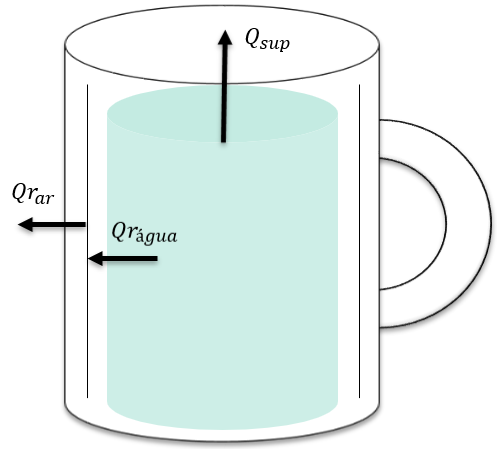

#### c) Diagrama de Estoques e Fluxos
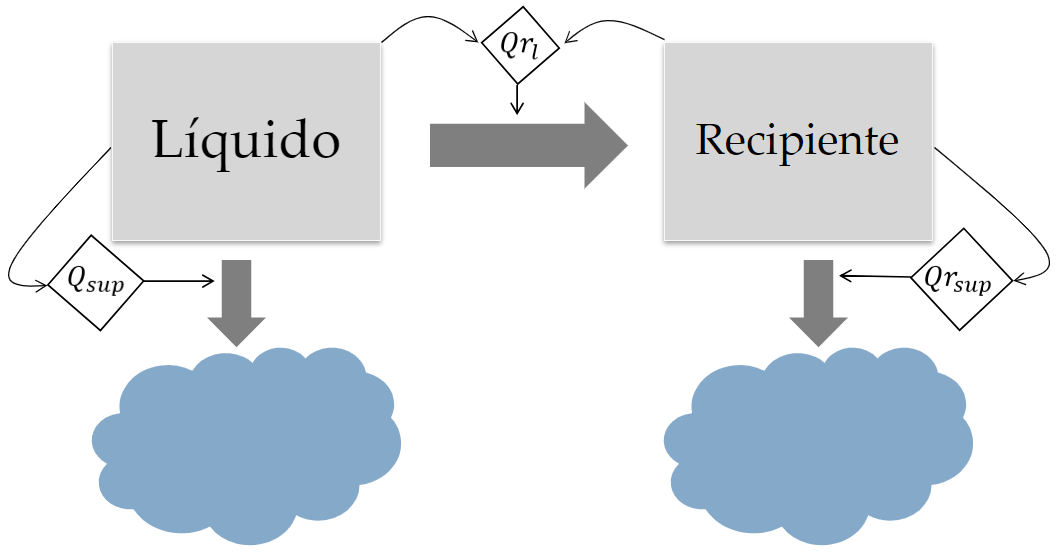

----

### Item 1 - Dados experimentais


#### a) Importação

Suponha, para efeitos didáticos, que tenhamos medido efetivamente a temperatura num tonel gigante cheio de óleo. Observe o código abaixo. Nele, declaramos duas listas com os dados medidos de tempo e temperatura do óleo.

In [479]:
# Importa dados experimentais
agua_salgada = [88.47, 85.04, 81.13, 78.69, 76.25, 73.31, 71.36, 69.40, 67.94, 66.47, 64.52, 63.05, 61.58, 60.61, 59.14, 58.16, 56.70, 55.72, 55.23, 54.25, 53.27, 52.30, 51.32, 50.34, 49.85, 48.88, 48.39, 47.41, 47.41, 46.92, 46.43, 45.45, 44.97, 44.48, 44.48, 43.50, 43.50, 42.52, 42.03, 41.54, 40.57, 40.08, 40.08, 40.57, 39.59, 39.10, 38.61, 38.61, 38.61, 37.63, 37.15, 37.15, 36.66, 36.66, 36.17, 36.17, 35.68, 35.68, 35.19, 35.68, 35.68, 34.70, 35.19, 34.21, 33.72, 34.21, 33.72, 33.72, 33.72, 33.72, 33.24, 33.24, 33.24, 33.24, 32.75, 32.75, 32.26, 32.26, 31.77, 31.35]
agua_adocada = [84.07, 81.62, 79.18, 76.25, 74.29, 71.36, 69.89, 68.91, 66.47, 65.49, 64.52, 63.05, 62.07, 61.09, 59.63, 59.14, 58.16, 56.70, 56.21, 55.72, 54.74, 53.76, 53.27, 52.30, 51.81, 51.32, 50.34, 49.85, 49.36, 48.88, 48.39, 47.41, 46.92, 46.43, 46.43, 45.94, 44.97, 44.97, 44.48, 43.99, 43.99, 43.50, 43.01, 42.52, 42.52, 42.03, 42.03, 41.06, 40.57, 40.57, 40.57, 40.57, 39.59, 39.59, 39.59, 39.10, 39.10, 38.61, 38.12, 38.12, 37.63, 37.63, 37.15, 37.15, 37.15, 36.66, 36.66, 36.66, 36.66, 36.17, 35.68, 35.19, 35.68, 35.68, 35.19, 35.19, 34.70, 34.70, 34.70, 34.21]
agua_pura = [83.09, 79.18, 76.25, 73.80, 70.87, 68.43, 66.96, 64.52, 63.05, 61.58, 60.12, 58.65, 57.67, 56.21, 55.72, 54.74, 53.27, 51.81, 50.83, 50.83, 49.85, 48.88, 48.39, 47.41, 46.92, 45.94, 45.45, 44.97, 43.50, 43.99, 43.50, 42.52, 42.52, 41.54, 41.54, 41.54, 40.08, 40.08, 39.59, 39.59, 39.10, 39.10, 38.12, 38.12, 37.63, 37.15, 36.66, 36.66, 36.17, 36.17, 35.68, 35.68, 35.68, 35.19, 35.68, 35.68, 34.70, 34.21, 34.21, 34.70, 33.72, 33.72, 33.72, 33.72, 32.75, 32.75, 32.75, 32.75, 32.26, 32.26, 31.77, 31.77, 32.26, 31.28, 31.77, 31.28, 31.28, 31.28, 30.79, 30.51]

tempo_salgada = np.arange(0, (len(agua_pura))*60, 60)/3600
tempo_adocada = np.arange(0, (len(agua_adocada))*60, 60)/3600
tempo_pura = np.arange(0, (len(agua_pura))*60, 60)/3600

----

### Item 2 - Modelagem


#### a) Parâmetros



In [480]:
# Declara os parâmetros do modelo

Ta = 30 + 273.15 # Temperatura do ambiente [K]
har = 26 # coeficiente de convectividade do ar [W/(m*K)]

kr = 1.4 # coeficiente de condutividade do recipiente [W/(m*K)]
mr = 0.309 # massa do recipiente [kg]
cr = 740 # calor específico do recipiente [J/(kg*K)]

H = 0.097 # altura do recipiente [m]
ri = 0.078/2 # raio interno do recipiente [m]
re = 0.081/2 # raio externo do recipiente [m]
ri_e = (ri+re)/2 # raio intermediario do recipiente [m]

Asup = pi*(ri**2) # área da superfície do líquido [m²]
Al = 2*pi*re*H # área da superfície lateral do recipiente [m²]

In [481]:
def coef_acucar (T): # Função que varia o calor específico da água com açucar conforme a temperatura
    lista_coef_acucar= [3950, 3960, 3970, 3970, 3980, 3990, 4000, 4000, 4010]
    coef = 0
    if T >= 20 and T < 30:
        coef = lista_coef_acucar[0]
    elif T >= 30 and T < 40:
        coef= lista_coef_acucar[1]
    elif T >= 40 and T < 50:
        coef= lista_coef_acucar[2]
    elif T >= 50 and T < 60:
        coef= lista_coef_acucar[3]
    elif T >= 60 and T < 70:
        coef= lista_coef_acucar[4]
    elif T >= 70 and T < 80:
        coef= lista_coef_acucar[5]
    elif T >= 80 and T < 90:
        coef= lista_coef_acucar[6]
    elif T >= 90 and T < 100:
        coef= lista_coef_acucar[7]
    elif T >= 100:
        coef= lista_coef_acucar[8]
    return coef

#### b) Modelo


In [482]:
def modelo1(x, t): # água salgada
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup # fluxo de calor por convecção da superfície do líquido para o ambiente
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr)) # fluxo de calor por condução do líquido para o recipiente
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr))) # fluxo de calor por condução e convecção do recipiente para o ambiente

    cl = 3600 # calor específico do líquido [J/(kg*K)] água salgada com 12% de sal
    ml = 0.224 # massa do líquido [J/(kg*K)] água salgada com 12% de sal

    dUl_dt = - Qlsup - Qlr
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [483]:
def modelo2(x, t): # água doce
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup # fluxo de calor por convecção da superfície do líquido para o ambiente
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr)) # fluxo de calor por condução do líquido para o recipiente
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr))) # fluxo de calor por condução e convecção do recipiente para o ambiente
    
    cl = coef_acucar(Tl) # calor específico da água com açúcar variando conforme a temperatura
    ml = 0.220 # massa do líquido [J/(kg*K)] água salgada com 10% de açúcar

    dUl_dt = - Qlsup - Qlr
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [484]:
def modelo3(x, t): # água pura
    Tl = x[0]
    Tr = x[1]

    Qlsup = (Tl - Ta)*har*Asup # fluxo de calor por convecção da superfície do líquido para o ambiente
    Qlr = (Tl - Tr)/((log(ri_e/ri))/(2*pi*H*kr)) # fluxo de calor por condução do líquido para o recipiente
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr))) # fluxo de calor por condução e convecção do recipiente para o ambiente

    cl = 4200 # calor específico do líquido [J/(kg*K)] água salgada com 10% de açúcar
    ml =  0.200 # massa do líquido [J/(kg*K)] água salgada com 10% de açúcar

    dUl_dt = - Qlsup - Qlr
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

#### c) Implementação e Validação


In [485]:
Tmax = 2*3600 # segundos
dt = 1
tempo_s = np.arange(0, Tmax, dt)
tempo_min = tempo_s/60
tempo_h = tempo_s/3600

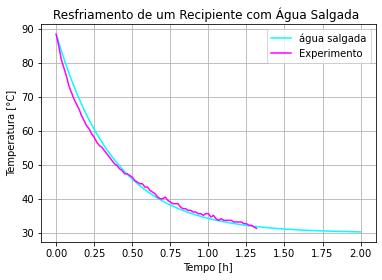

In [486]:
X0 = [273.15 + agua_salgada[0], 273.15 + agua_salgada[0]] # definindo a temperatura inicial igual a do experimento

Xy1 = odeint(modelo1, X0, tempo_s)

Tl_y1 = list(Xy1[:,0] - 273.15)
Tr_y1 = list(Xy1[:,1] - 273.15)

plt.plot(tempo_h, Tl_y1, color="cyan", label="água salgada")
# plt.plot(tempo_h, Tr_y1, color="blue", label="Recipiente") # está comentado pq ele sobrepoem o gráfico da temperatura da água
plt.plot(tempo_salgada, agua_salgada, color="fuchsia", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Salgada ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

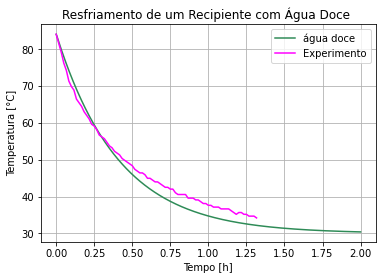

In [487]:
X0 = [273.15 + agua_adocada[0], 273.15 + agua_adocada[0]] # definindo a temperatura inicial igual a do experimento

Xy2 = odeint(modelo2, X0, tempo_s)

Tl_y2 = list(Xy2[:,0] - 273.15)
Tr_y2 = list(Xy2[:,1] - 273.15)

plt.plot(tempo_h, Tl_y2, color="seagreen", label="água doce")
# plt.plot(tempo_h, Tr_y2, color= "blue", label= "Recipiente") # está comentado pq ele sobrepoem o gráfico da temperatura da água
plt.plot(tempo_adocada, agua_adocada, color="fuchsia", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Doce ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

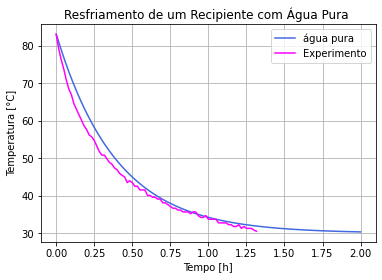

In [488]:
X0 = [273.15 + agua_pura[0], 273.15 + agua_pura[0]] # definindo a temperatura inicial igual a do experimento

Xy3 = odeint(modelo3, X0, tempo_s)

Tl_y3 = list(Xy3[:,0] - 273.15)
Tr_y3 = list(Xy3[:,1] - 273.15)

plt.plot(tempo_h, Tl_y3, color="royalblue", label="água pura")
# plt.plot(tempo_h, Tr_y3, color= "blue", label= "Recipiente") # está comentado pq ele sobrepoem o gráfico da temperatura da água
plt.plot(tempo_pura, agua_pura, color="fuchsia", label="Experimento")
plt.title("Resfriamento de um Recipiente com Água Pura ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

### d) Conclusão

In [489]:
Tmax = 3*3600 # segundos
dt = 1
tempo_s = np.arange(0, Tmax, dt)
tempo_min = tempo_s/60
tempo_h = tempo_s/3600

X0 = [273.15 + 100, 273.15 +100] # definindo a temperatura inicial igual a 100°C
Ta = 25 + 273.15 # considerando que a temperatura ambiente é 97% da temperatura ambiente real, uma vez que o modelo forma uma assíndota

In [490]:
Xy1 = odeint(modelo1, X0, tempo_s)
Tl_y1 = list(Xy1[:,0] - 273.15)

Xy2 = odeint(modelo2, X0, tempo_s)
Tl_y2 = list(Xy2[:,0] - 273.15)

Xy3 = odeint(modelo3, X0, tempo_s)
Tl_y3 = list(Xy3[:,0] - 273.15)

In [491]:
def tempo_para_Tamb(tempo_h, Tl_y1, Tl_y2, Tl_y3):
    lista_temp_25= []

    Tamb = 25*1.03 # considerando que a temperatura ambiente é 97% da temperatura ambiente real, uma vez que o modelo forma uma assíndota
    
    i = 0
    for hr in tempo_h:
        if Tl_y1[i] <= Tamb:
            lista_temp_25.append(hr) 
            break
        i += 1

    i = 0
    for hr in tempo_h:      
        if Tl_y2[i] <= Tamb:
            lista_temp_25.append(hr) 
            break
        i += 1

    i = 0
    for hr in tempo_h:
        if Tl_y3[i] <= Tamb:
            lista_temp_25.append(hr)
            break
        i += 1

    return lista_temp_25

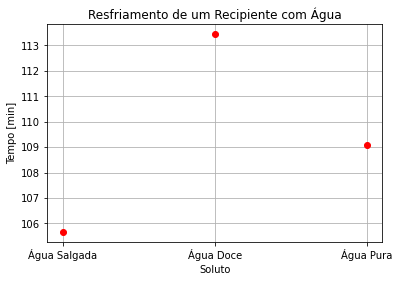

In [492]:
lista_nome_aguas= ["Água Salgada", "Água Doce", "Água Pura"]
lista_tempo_Tamb = tempo_para_Tamb(tempo_min, Tl_y1, Tl_y2, Tl_y3)

plt.plot(lista_nome_aguas, lista_tempo_Tamb, "ro")
plt.title("Resfriamento de um Recipiente com Água")
plt.xlabel("Soluto")
plt.ylabel("Tempo [min]")
plt.grid()
plt.show()